In [167]:
!pip install mplfinance

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [169]:
df = pd.read_csv('/kaggle/input/forexsoftware-historical-forex-data/Historical Forex Data/EURUSD_M1.csv')

In [170]:
df.head()

,Time,Open,High,Low,Close,Volume
0,30/05/2024 9:16,1.08171,1.08181,1.08167,1.08180,135
1,30/05/2024 9:17,1.08181,1.08181,1.08166,1.08166,27
2,30/05/2024 9:18,1.08167,1.08172,1.08167,1.08171,57
3,30/05/2024 9:19,1.08169,1.08169,1.08159,1.08161,114
4,30/05/2024 9:20,1.08162,1.08163,1.08152,1.08158,109


In [171]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)

In [172]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2024-05-30 09:16:00,1.08171,1.08181,1.08167,1.08180,135
1,2024-05-30 09:17:00,1.08181,1.08181,1.08166,1.08166,27
2,2024-05-30 09:18:00,1.08167,1.08172,1.08167,1.08171,57
3,2024-05-30 09:19:00,1.08169,1.08169,1.08159,1.08161,114
4,2024-05-30 09:20:00,1.08162,1.08163,1.08152,1.08158,109


In [173]:
df.describe()

,Time,Open,High,Low,Close,Volume
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2024-07-18 19:10:59.220599808,1.088571,1.088621,1.088520,1.088571,146.344730
min,2024-05-30 09:16:00,1.066710,1.066820,1.066600,1.066700,1.000000
25%,2024-06-24 21:46:45,1.078940,1.078980,1.078890,1.078940,46.000000
50%,2024-07-18 10:38:30,1.086820,1.086870,1.086760,1.086820,100.000000
75%,2024-08-12 20:49:15,1.095200,1.095270,1.095110,1.095200,190.000000
max,2024-09-05 07:59:00,1.120070,1.120150,1.120020,1.120080,2174.000000
std,NaN,0.013323,0.013326,0.013321,0.013323,159.493171


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    100000 non-null  datetime64[ns]
 1   Open    100000 non-null  float64       
 2   High    100000 non-null  float64       
 3   Low     100000 non-null  float64       
 4   Close   100000 non-null  float64       
 5   Volume  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 MB


In [175]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [176]:
df.isnull().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visualization

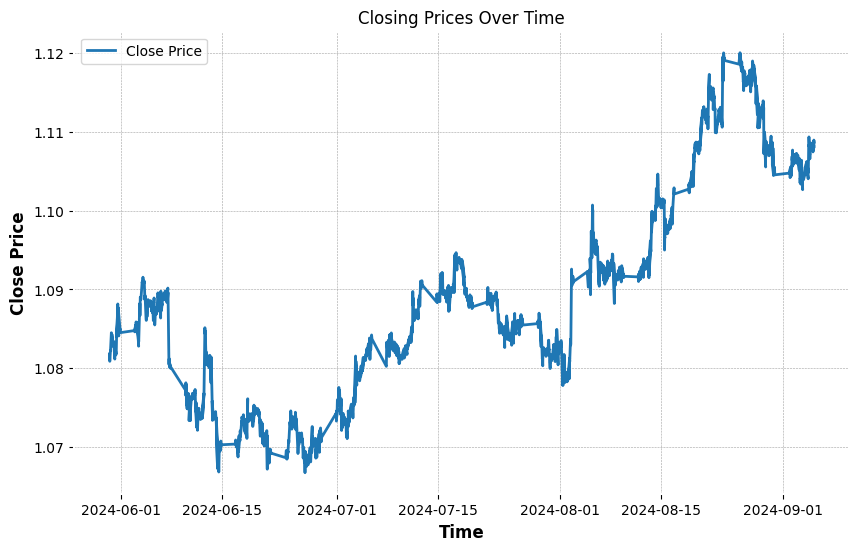

In [177]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

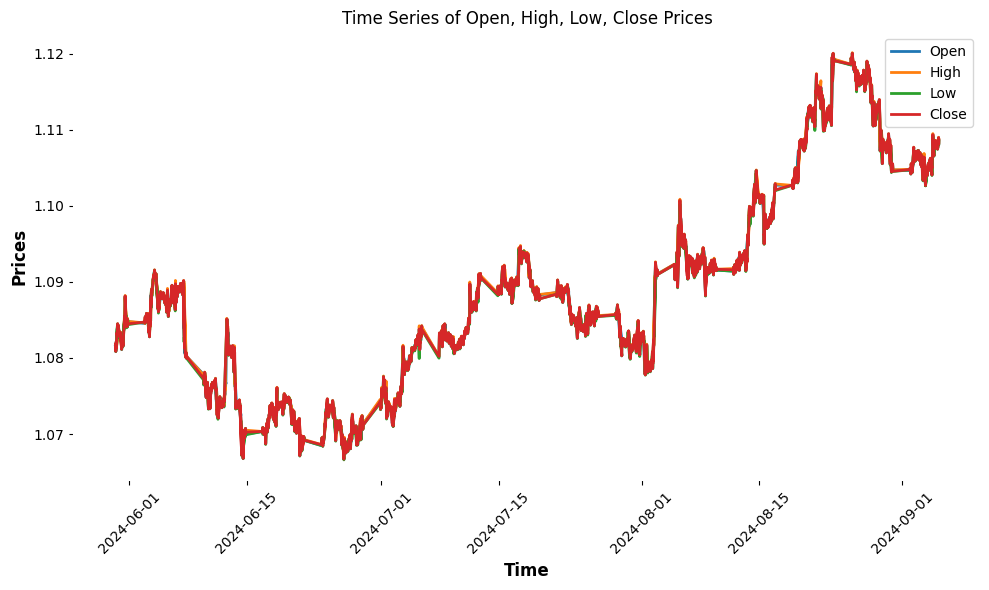

In [178]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Open'], label='Open')
plt.plot(df['Time'], df['High'], label='High')
plt.plot(df['Time'], df['Low'], label='Low')
plt.plot(df['Time'], df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


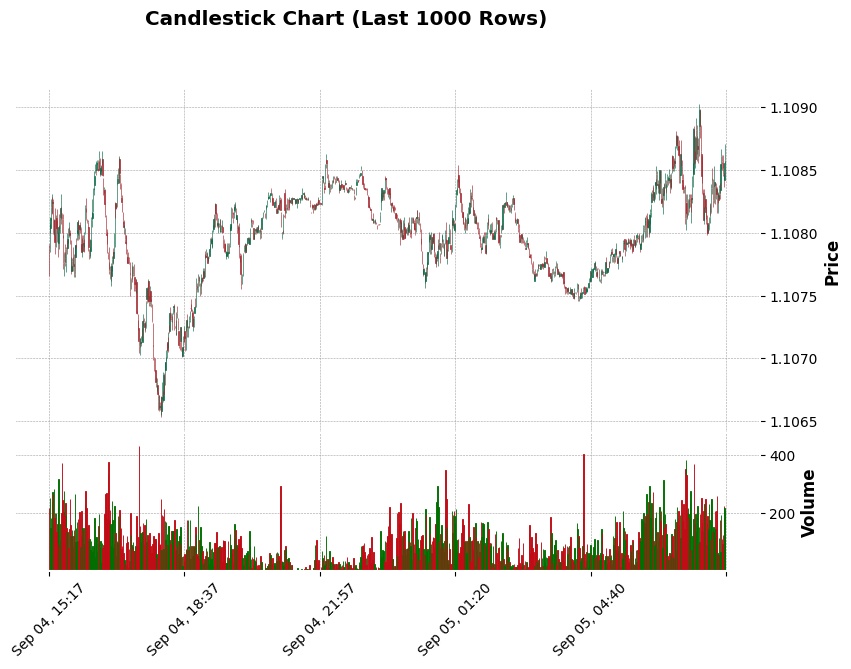

In [179]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Set the 'Time' as the index for plotting
subset_df.set_index('Time', inplace=True)

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


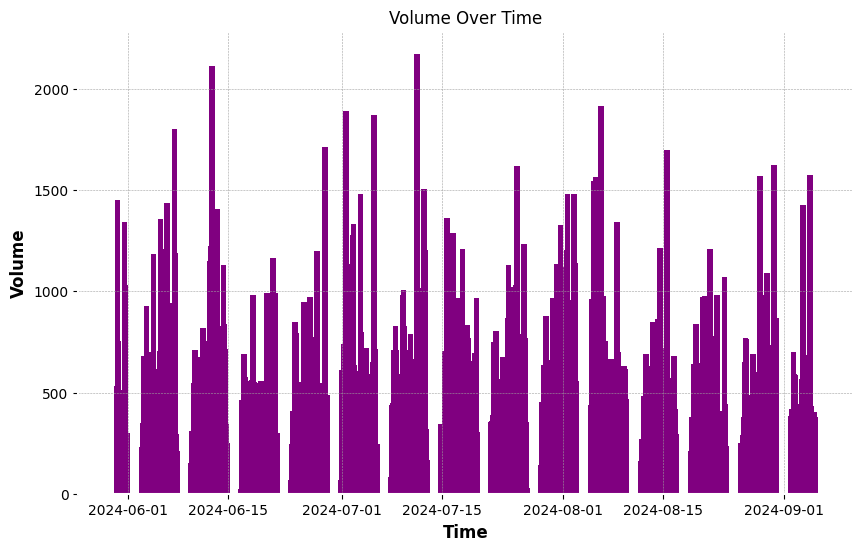

In [180]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Time'], df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


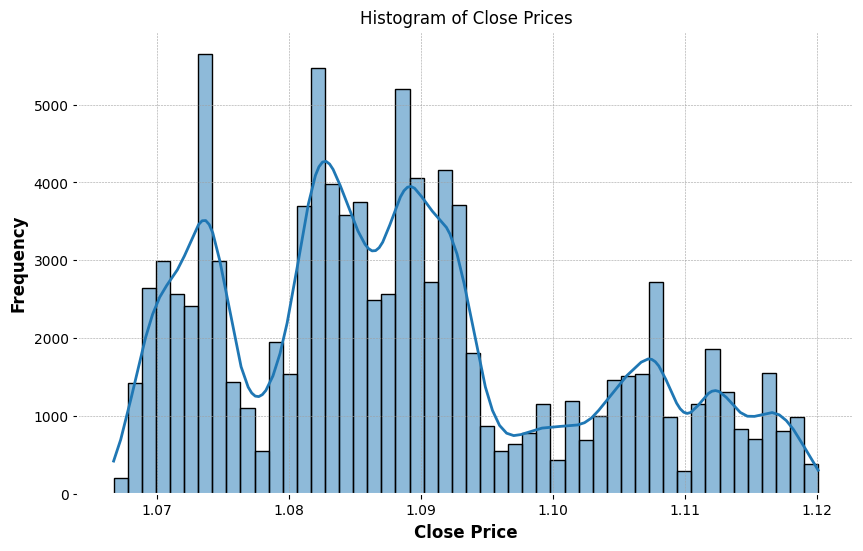

In [181]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

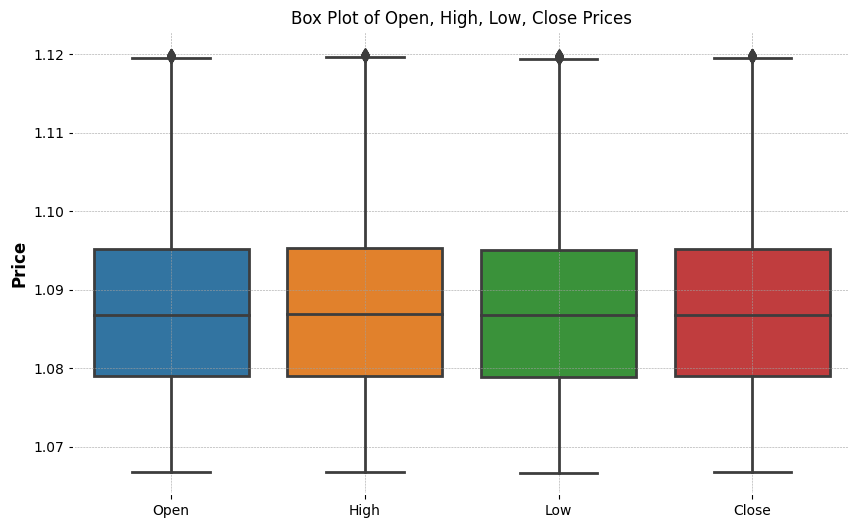

In [182]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

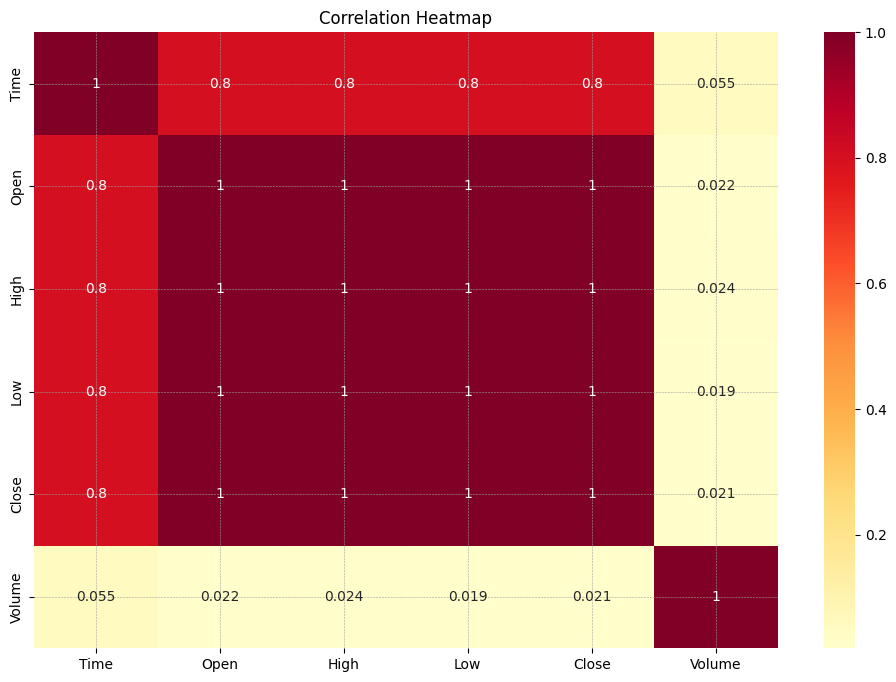

In [183]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

Creation of the Target Column(Price direction)

In [ ]:
# Calculate percentage change between consecutive closing prices
df['Pct Change'] = df['Close'].pct_change() * 100

# Define thresholds for 'Up', 'Down', and 'Neutral'
def price_direction(change):
    if change > 0.5:
        return 'Up'
    elif change < -0.5:
        return 'Down'
    else:
        return 'Neutral'

# Apply the function to create the 'Price Direction' column
df['Price Direction'] = df['Pct Change'].shift(-1).apply(price_direction)

# Drop the percentage change column if not needed
df = df.drop(columns=['Pct Change'])

Lagged Returns / Price Differences

In [ ]:
df['1_day_return'] = df['Close'].pct_change(1)
df['7_day_return'] = df['Close'].pct_change(7)
df['14_day_return'] = df['Close'].pct_change(14)


Moving Averages (MA)

In [ ]:
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_14'] = df['Close'].rolling(window=14).mean()
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()


Relative Strength Index (RSI)

In [5]:
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a given data series.

    Parameters:
    data (pandas.Series): The price series (e.g., closing prices).
    window (int): The look-back period for RSI calculation (default is 14).

    Returns:
    pandas.Series: RSI values for the given data.
    """
    # Calculate price changes
    delta = data.diff()

    # Separate the positive and negative changes
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [ ]:
df['RSI'] = calculate_rsi(df['Close'], window=14) 

Bollinger Bands

In [2]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Std_20'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['MA_20'] + (df['Std_20'] * 2)
df['Lower_Band'] = df['MA_20'] - (df['Std_20'] * 2)


NameError: name 'df' is not defined

 On-Balance Volume (OBV)

In [ ]:
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()


Volatility

In [ ]:
df['ATR_14'] = compute_atr(df['High'], df['Low'], df['Close'], window=14)  # Function to compute ATR


Crossover Indicators

In [ ]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['SMA_Cross'] = np.where(df['SMA_50'] > df['SMA_200'], 1, 0)


 Volume-Based Features

In [3]:
df['Volume_Change'] = df['Volume'].pct_change()
df['Volume_SMA_7'] = df['Volume'].rolling(window=7).mean()


NameError: name 'df' is not defined

Price Momentum (Stochastic Oscillator)

In [4]:
def compute_stochastic(close, low, high, window=14):
    """
    Function to compute the Stochastic Oscillator.
    
    Parameters:
    - close (pd.Series): Series of closing prices.
    - low (pd.Series): Series of low prices.
    - high (pd.Series): Series of high prices.
    - window (int): The look-back period for the oscillator (default 14 days).
    
    Returns:
    - pd.Series: Stochastic Oscillator (%K) values.
    """
    # Calculate the rolling lowest low and highest high over the specified window
    lowest_low = low.rolling(window=window).min()
    highest_high = high.rolling(window=window).max()

    # Calculate the Stochastic Oscillator (%K)
    stochastic_k = ((close - lowest_low) / (highest_high - lowest_low)) * 100

    return stochastic_k


In [ ]:
df['Stochastic_Oscillator'] = compute_stochastic(df['Close'], df['Low'], df['High'], window=14)

In [185]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
0,2024-05-30 09:16:00,1.08171,1.08181,1.08167,1.08180,135,0.00014,0.00010,0.00004,NaN,...,NaN,NaN,NaN,1.081710,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-30 09:17:00,1.08181,1.08181,1.08166,1.08166,27,0.00015,0.00000,0.00015,NaN,...,NaN,0.00010,0.00000,1.081760,-80.000000,NaN,1.08171,1.08181,1.08167,135.0
2,2024-05-30 09:18:00,1.08167,1.08172,1.08167,1.08171,57,0.00005,0.00005,0.00000,0.000063,...,1.08178,-0.00014,-0.00009,1.081715,111.111111,73.000000,1.08181,1.08181,1.08166,27.0
3,2024-05-30 09:19:00,1.08169,1.08169,1.08159,1.08161,114,0.00010,0.00000,0.00010,0.000058,...,1.08174,0.00002,-0.00003,1.081703,100.000000,66.000000,1.08167,1.08172,1.08167,57.0
4,2024-05-30 09:20:00,1.08162,1.08163,1.08152,1.08158,109,0.00011,0.00001,0.00010,0.000049,...,1.08168,-0.00007,-0.00006,1.081661,-4.385965,93.333333,1.08169,1.08169,1.08159,114.0


In [186]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    2
True_Range            0
SMA_Open_3            2
SMA_High_3            2
Momentum_Open_1       1
Momentum_High_1       1
EMA_Open              0
Volume_Change         1
SMA_Volume_3          2
Lagged_Open_1         1
Lagged_High_1         1
Lagged_Low_1          1
Lagged_Volume_1       1
dtype: int64

In [188]:
df.fillna(df.bfill(), inplace=True) 

In [189]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    0
True_Range            0
SMA_Open_3            0
SMA_High_3            0
Momentum_Open_1       0
Momentum_High_1       0
EMA_Open              0
Volume_Change         0
SMA_Volume_3          0
Lagged_Open_1         0
Lagged_High_1         0
Lagged_Low_1          0
Lagged_Volume_1       0
dtype: int64

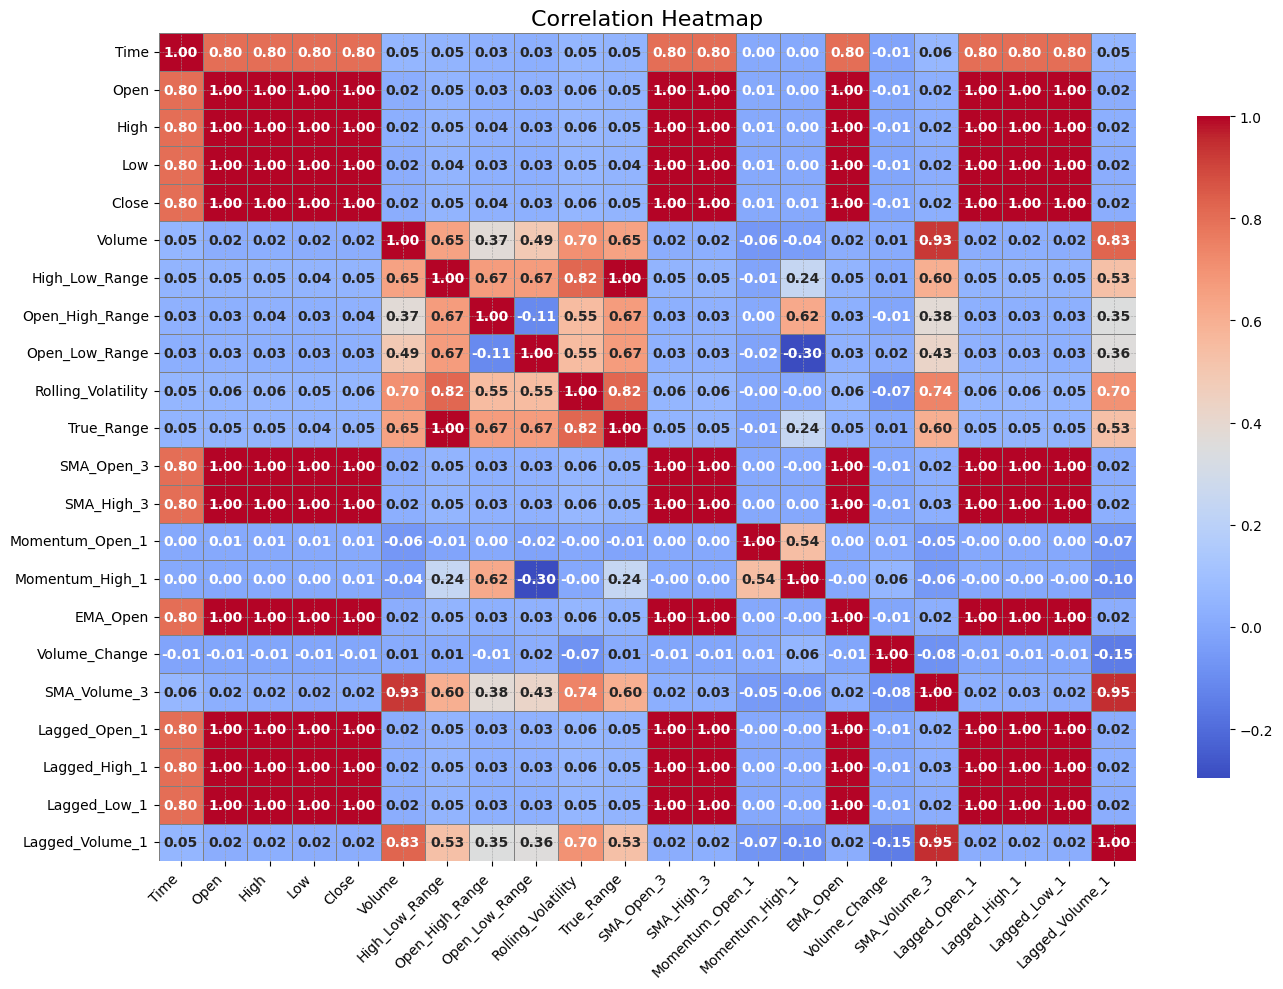

In [192]:
plt.figure(figsize=(14, 10)) 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 10, "weight": 'bold'}, 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={"shrink": .8}  
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  

plt.tight_layout()
plt.show()

In [193]:
# Extract the target column
target = 'Price Direction'

# Calculate Correlation with target column
correlation = df.corr()[target]

# Calculate Mutual Information
# Ensure that data types are numeric for mutual_info_regression
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(columns=[target])
y = df[target]

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to hold mutual information values
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi
})

# Merge mutual information with correlation
results = pd.DataFrame({
    'Correlation': correlation.drop(target),
    'Mutual_Information': mi_df.set_index('Feature')['Mutual_Information']
})

# Display results
print(results)

                    Correlation  Mutual_Information
EMA_Open               0.999965            4.726002
High                   0.999987            5.609374
High_Low_Range         0.047234            0.086733
Lagged_High_1          0.999959            4.693229
Lagged_Low_1           0.999959            4.695230
Lagged_Open_1          0.999947            4.517011
Lagged_Volume_1        0.021070            0.077165
Low                    0.999986            5.617386
Momentum_High_1        0.005540            0.021432
Momentum_Open_1        0.005103            0.022482
Open                   0.999975            4.895594
Open_High_Range        0.035040            0.024358
Open_Low_Range         0.028107            0.022922
Rolling_Volatility     0.056724            0.132905
SMA_High_3             0.999970            4.853246
SMA_Open_3             0.999959            4.640224
SMA_Volume_3           0.022589            0.124152
Time                   0.801940                 NaN
True_Range  

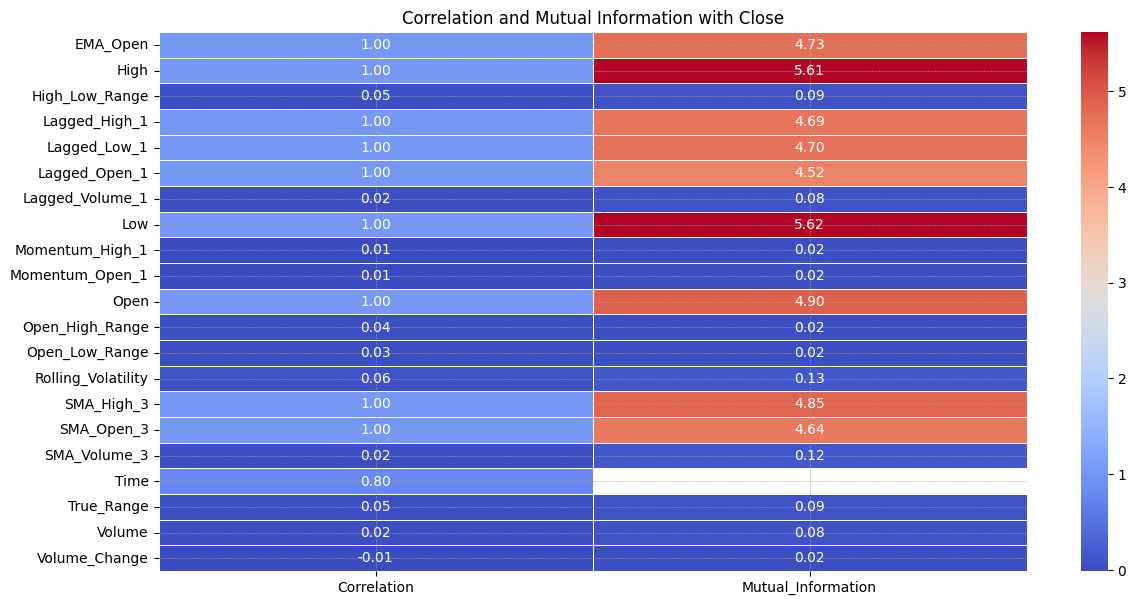

In [194]:
# Plotting the results
plt.figure(figsize=(14, 7))
sns.heatmap(results, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation and Mutual Information with Close')
plt.show()

In [195]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
2,2024-05-30 09:18:00,1.08167,1.08172,1.08167,1.08171,57,0.00005,0.00005,0.00000,0.000063,...,1.081780,-0.00014,-0.00009,1.081715,111.111111,73.000000,1.08181,1.08181,1.08166,27.0
3,2024-05-30 09:19:00,1.08169,1.08169,1.08159,1.08161,114,0.00010,0.00000,0.00010,0.000058,...,1.081740,0.00002,-0.00003,1.081703,100.000000,66.000000,1.08167,1.08172,1.08167,57.0
4,2024-05-30 09:20:00,1.08162,1.08163,1.08152,1.08158,109,0.00011,0.00001,0.00010,0.000049,...,1.081680,-0.00007,-0.00006,1.081661,-4.385965,93.333333,1.08169,1.08169,1.08159,114.0
5,2024-05-30 09:21:00,1.08157,1.08165,1.08156,1.08161,52,0.00009,0.00008,0.00001,0.000056,...,1.081657,-0.00005,0.00002,1.081616,-52.293578,91.666667,1.08162,1.08163,1.08152,109.0
6,2024-05-30 09:22:00,1.08161,1.08165,1.08150,1.08165,161,0.00015,0.00004,0.00011,0.000063,...,1.081643,0.00004,0.00000,1.081613,209.615385,107.333333,1.08157,1.08165,1.08156,52.0


In [200]:
df.dtypes

Time                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
High_Low_Range               float64
Open_High_Range              float64
Open_Low_Range               float64
Rolling_Volatility           float64
True_Range                   float64
SMA_Open_3                   float64
SMA_High_3                   float64
Momentum_Open_1              float64
Momentum_High_1              float64
EMA_Open                     float64
Volume_Change                float64
SMA_Volume_3                 float64
Lagged_Open_1                float64
Lagged_High_1                float64
Lagged_Low_1                 float64
Lagged_Volume_1              float64
dtype: object

## Splitting the Data

In [201]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Next_Close' is the target column

# Separate features and target
X = df.drop(columns=['Price Direction','Time'])
y = df['Price Direction']

# First split: Train and temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 69998
Validation set size: 15000
Testing set size: 15000


## Training and Evaluating Models

**Linear Regression**

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

# Evaluate the model
print("Linear Regression")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")


Linear Regression
Validation RMSE: 3.796990925568121e-05
Validation R^2: 0.9999917880589927
Test RMSE: 3.794011962806156e-05
Test R^2: 0.9999918940796898
Test MAE: 2.448580512836373e-05


**Random Forest Regressor**

In [203]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Regressor")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")


Random Forest Regressor
Validation RMSE: 4.431899512248252e-05
Validation R^2: 0.9999888121531706
Test RMSE: 4.1975122235273366e-05
Test R^2: 0.9999900782363565
Test MAE: 2.690233333332852e-05


**Gradient Boosting Regressor**

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = gbr.predict(X_val)
y_test_pred = gbr.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")


Gradient Boosting Regressor
Validation RMSE: 0.00011115543088022461
Validation R^2: 0.9999296234334114
Test RMSE: 0.00011057301549293402
Test R^2: 0.9999311501108682
Test MAE: 8.025961885001411e-05
